<a href="https://colab.research.google.com/github/legobitna/DeepLearning-basic/blob/main/Vietnamese_Poem_Generation_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://i.imgur.com/1Bn8gwj.png)

The data are two files in the data folder so please work on that!

In [1]:
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data_file_1="/content/drive/MyDrive/FTMLE | 2020.09 | Kermadec/Week 10/10.1f_Vietnam_Poem_Generation_Exercise_(Lục_Bát)/crawled_data_from_www.thivien.net/a.txt"
data_file_2="/content/drive/MyDrive/FTMLE | 2020.09 | Kermadec/Week 10/10.1f_Vietnam_Poem_Generation_Exercise_(Lục_Bát)/crawled_data_from_www.thivien.net/b.txt"

Here is a small poem from our data:

```
đường thu vàng cả thời gian 
gió se se lạnh vít làn thu sang 
đường quê nhạt nắng hanh vàng 
bao nhiêu kỷ niệm mơ màng trong ta 
gió thu môi ấm mặn mà 
ven hồ liễu rủ tóc nhoà điểm sương 
trời xanh chiều tím quê hương 
tìm về ký ức sắc hường ngẩn ngơ 
chông chênh cây trút lá rồi 
cành ươm mầm nhú khoảng trời nhấp nhô 
hương quê trên đường ngoại ô 
thu cùng ta đến bến bờ yêu thương 
```

In [4]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional,GlobalMaxPool1D,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [5]:
# YOUR CODE TO GENERATE MORE VIETNAMESE POEMS (LỤC BÁT)
 
tokenizer = Tokenizer(filters = '!"#$%&()*+,-/:;<=>?@[\\]^_`{|}~\t\n')

# it is stored in one single string
# 1. 데이터를 읽어온다 
data = open(data_file_1).read()


In [6]:
import re

# 2. 데이터를 엔터기준으로 짜갠다 
old_corpus = re.split('[.\n]',data)

In [7]:
print(old_corpus[:10])

['đường thu vàng cả thời gian ', 'gió se se lạnh vít làn thu sang ', 'đường quê nhạt nắng hanh vàng ', 'bao nhiêu kỷ niệm mơ màng trong ta ', 'gió thu môi ấm mặn mà ', 'ven hồ liễu rủ tóc nhoà điểm sương ', 'trời xanh chiều tím quê hương ', 'tìm về ký ức sắc hường ngẩn ngơ ', 'chông chênh cây trút lá rồi ', 'cành ươm mầm nhú khoảng trời nhấp nhô ']


In [8]:
# 3. 왠진 모르겠찌만 두문장씩 붙여준다 
corpus = []
tmp_cache = []
for s in old_corpus:
    stripped = s.strip()
    if len(stripped):
        if len(tmp_cache) in [0,1]:
            tmp_cache.append(stripped)            
            if len(tmp_cache)==2:
                corpus.append(' . '.join(tmp_cache))
                tmp_cache=[]
if len(tmp_cache)==1:
    corpus.append(tmp_cache[0])

In [9]:
corpus[:10]

['đường thu vàng cả thời gian . gió se se lạnh vít làn thu sang',
 'đường quê nhạt nắng hanh vàng . bao nhiêu kỷ niệm mơ màng trong ta',
 'gió thu môi ấm mặn mà . ven hồ liễu rủ tóc nhoà điểm sương',
 'trời xanh chiều tím quê hương . tìm về ký ức sắc hường ngẩn ngơ',
 'chông chênh cây trút lá rồi . cành ươm mầm nhú khoảng trời nhấp nhô',
 'hương quê trên đường ngoại ô . thu cùng ta đến bến bờ yêu thương',
 'trăng là hoa của trời trong . sao kia tựa những cánh ong rụng rời',
 'gió đàn hưu hắt người ơi . mây tơ con nhện rối bời không gian',
 'trời cao mây gợn nắng lan . gió heo may thổi miên man bên rào',
 'vài con bướm trắng lao xao . vàng bông hoa cúc cài vào vạt bay']

In [10]:
#4. 문장에 인덱스를 부여한다 
tokenizer.fit_on_texts(corpus)

In [11]:
total_words = len(tokenizer.word_index) + 1

In [12]:
print(total_words)
len(corpus)

7114


25141

In [13]:
#what happen in the first loop
# 5. 인덱스넘버를 각각 단어에 부여하는데 없는단어이면 넘어가버림 
print(corpus[2])
token_list = tokenizer.texts_to_sequences([corpus[2]])[0]
token_list

gió thu môi ấm mặn mà . ven hồ liễu rủ tóc nhoà điểm sương


[26, 113, 249, 290, 570, 38, 1, 1677, 376, 971, 1073, 158, 2020, 1007, 129]

In [14]:

input_sequences=[]
for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)
input_sequences

[[26, 113],
 [26, 113, 249],
 [26, 113, 249, 290],
 [26, 113, 249, 290, 570],
 [26, 113, 249, 290, 570, 38],
 [26, 113, 249, 290, 570, 38, 1],
 [26, 113, 249, 290, 570, 38, 1, 1677],
 [26, 113, 249, 290, 570, 38, 1, 1677, 376],
 [26, 113, 249, 290, 570, 38, 1, 1677, 376, 971],
 [26, 113, 249, 290, 570, 38, 1, 1677, 376, 971, 1073],
 [26, 113, 249, 290, 570, 38, 1, 1677, 376, 971, 1073, 158],
 [26, 113, 249, 290, 570, 38, 1, 1677, 376, 971, 1073, 158, 2020],
 [26, 113, 249, 290, 570, 38, 1, 1677, 376, 971, 1073, 158, 2020, 1007],
 [26, 113, 249, 290, 570, 38, 1, 1677, 376, 971, 1073, 158, 2020, 1007, 129]]

In [15]:
# 5. 전체데이터에 인덱스 부여 
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    # we are generating n-gram from the token list above
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [16]:
input_sequences[:20]

[[34, 113],
 [34, 113, 66],
 [34, 113, 66, 148],
 [34, 113, 66, 148, 109],
 [34, 113, 66, 148, 109, 141],
 [34, 113, 66, 148, 109, 141, 1],
 [34, 113, 66, 148, 109, 141, 1, 26],
 [34, 113, 66, 148, 109, 141, 1, 26, 1111],
 [34, 113, 66, 148, 109, 141, 1, 26, 1111, 1111],
 [34, 113, 66, 148, 109, 141, 1, 26, 1111, 1111, 267],
 [34, 113, 66, 148, 109, 141, 1, 26, 1111, 1111, 267, 1806],
 [34, 113, 66, 148, 109, 141, 1, 26, 1111, 1111, 267, 1806, 961],
 [34, 113, 66, 148, 109, 141, 1, 26, 1111, 1111, 267, 1806, 961, 113],
 [34, 113, 66, 148, 109, 141, 1, 26, 1111, 1111, 267, 1806, 961, 113, 136],
 [34, 48],
 [34, 48, 633],
 [34, 48, 633, 57],
 [34, 48, 633, 57, 1120],
 [34, 48, 633, 57, 1120, 66],
 [34, 48, 633, 57, 1120, 66, 1]]

In [17]:
# 6. 가장긴게 23임 
max_sequence_len = max([len(x) for x in input_sequences])
max_sequence_len

23

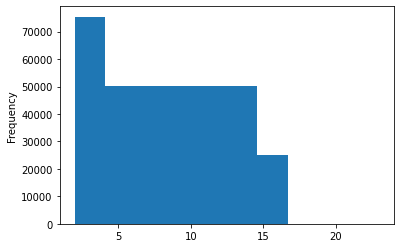

In [18]:
import pandas as pd
pd.Series([len(x) for x in input_sequences]).plot(kind='hist')

In [19]:
# , 짧은 문장은 패딩도 앞에 넣어줌 

input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, truncating='pre', padding='pre'))

In [20]:
# 문장과 문장끝에 단어 분리해서 라벨만들기 
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

In [21]:
# 라벨로 띄어둔 단어를 뭔가 특별하게 인코딩 
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [22]:
# 아까 맥스렝쓰를 16으로 했으니까 xs 는 15가 맞음 나머지 1은 라벨로 떨어져나감 
xs.shape

(351964, 22)

In [23]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
#     -O /content/glove.6B.100d.txt

In [24]:
# 단어의 특성을 나타내주는 glove 다운 및 워드 임베딩 준비 
# import numpy as np
# from pathlib import Path
# path_to_glove_file = Path('glove.6B.100d.txt')


# embeddings_index = {}
# with open(path_to_glove_file) as f:
#     for line in f:
#         word, coefs = line.split(maxsplit=1)
#         coefs = np.fromstring(coefs, "f", sep=" ")
#         embeddings_index[word] = coefs

# print("Found %s word vectors." % len(embeddings_index))

In [25]:
#워드 임베딩 레이어 준비 
# embedding_layer = tf.keras.layers.Embedding(
#     total_words,
#     100,
#     embeddings_initializer=tf.keras.initializers.Constant(embeddings_index),
#     trainable=True, # experiment with this
#     input_length=max_sequence_len-1
# )

In [ ]:
# 모델 만들기 
# 이거는 glove 추가시에 쓰던 모델 근데 이거는 그거 필요 없는듯 
# model = Sequential()

# # input_length we need to minus 1 here because we take one out to become the label
# model.add(embedding_layer)
# # model.add(Bidirectional(LSTM(128,return_sequences=True)))
# model.add(LSTM(128))
# # model.add(GlobalMaxPool1D())
# model.add(Dropout(0.2))
# model.add(Dense(total_words, activation='softmax'))
# adam = Adam(lr=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model = Sequential()

# input_length we need to minus 1 here because we take one out to become the label
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=2, verbose=1)
#print model.summary()
print(model)

Epoch 1/2
 2662/10999 [======>.......................] - ETA: 12:19 - loss: 7.2937 - accuracy: 0.0733

In [ ]:
# 모델 훈련 
# history = model.fit(xs, ys, epochs=100, verbose=2)

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

In [ ]:
plot_graphs(history, 'accuracy')

In [ ]:
# 이제 한번 ㄴ테스트 어떤 문장이 만들어 지는지 
seed_text = "ao thu lạnh lẽo"
next_words = 52
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
  
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

In [ ]:
seed_list=seed_text.split()

while seed_list:
  for i in range(6):
    if seed_list:
      word = seed_list[0]
      seed_list = seed_list[1:]
      print(word,end=" ")
  print()
  for i in range(8):
    if seed_list:
      word = seed_list[0]
      seed_list = seed_list[1:]
      print(word,end=" ")
  print()